### Reinforcement Learning

    Keywords: Agent, Environment, State, Action, Terminal States Reward, Return, discount factor, policy, Q function(State action value function), Markov Decision Process(MDP)
    
    Reinforcement is another category of unsupervised Learning.
    
    Think of simplified Mars rover example for demonstration.
    
    Mars Rover is an agent/robot, which contains certain discrete states (s1, s2, s3, s4, s5, s6) in an environment(Mars environment may be). Think of these states as the position of the robot or a autonomous helicopter car. The states can be very be discrete (as small as 6 or more) or continuous states(continuous numbers like states of helicopter m/s)
    
    Lets say, the Mars rover is in some state s4 which will be treated as current state at a time step. The rover can perform two actions (moving left <- , moving right -> ). By performing the action a, the agent will move to new state s' (s prime).
    
    Note actions can be many more not just two.
    
    Each state including the current state will have a reward. Reward r is a kind of appreciation to the agent when it performed the action a correctly at state s.
    
    The way we will reflect state 1 being potentially more valuable is through the reward function. The reward at state 1 is a 100, and the reward at state 6 is 40, and the rewards at all of the other states in-between, as 0 because there's not as much interesting science to be done at these states 2, 3, 4, and 5 for the mars rover.
    
    These two states s1 and s6 are called terminal states, each with rewards 100 and 40, all the other states will have rewards 0.
    
    Note that reward agent gets from the current state is also "immediate reward"
    
    At any current state s, the agent can perform an action a (moving <- or ->) to get to any of these terminal states.
    
    It can go from s4 to s3, s2, terminal when moving <-
    
    It can go from s4 to s5, terminal when moving ->
    
    The robot can also waste time by going  from s4 to s5 and then again to s4, s3, s2, terminal. In this case, the robot is wasting time and the reward it gets at the end will get discounted more and more when it takes longer time/path to reach the terminal node.
    
    The task is to make this mars rover to move from its current state s4 to any of the terminal nodes along with maximizing the reward it gets at the end.
    
    When moving along the states, the agent gets reward of each state it comes to + cumulative reward of the subsequent states disocunted by discount factor until the terminal state(any of the two)
    
    This cumulative reward is called "Return" the agent gets.
    
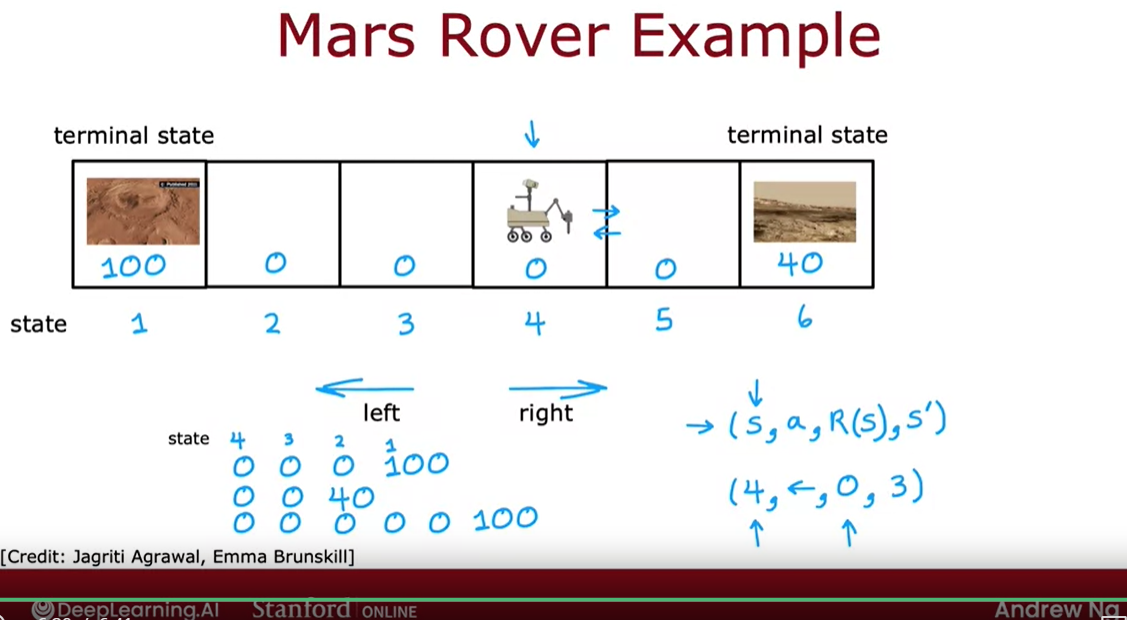
    
##### Returns (R)
    Depending on the actions you take at a current state s, you go through different states, and also get to enjoy different rewards. But how do you know if a particular set of rewards is better or worse than a different set of rewards?
    
            Returns will capture what are best set of rewards a agent could get.
    
    In the above example, if the agent starts at state 4 and it can move either <- or ->. By moving left, the agent is aiming to reach terminal state 100, by moving right, the agent is aiming to reach terminal state 40
    
    If it moves left, then the cumulative reward/ return R is calculated as sum of all the subsequrnt state rewards that are weighted by discount factor.
    
        Return R = reward(currentstate S=4) + γ reward(nextstate S=3) + γ^2 reward(2ndnextstate S=2) + γ^3 reward(terminalstate)
          
          --------------------------------------------------------------------------------  
                Return = r(S=4) + γ r(S=3) + γ^2 r(S=2) + γ^3 r(terminalstate)
          --------------------------------------------------------------------------------
          
                For the current state as S=4, the return for action or moving left <- is
                
                        Return(S=4) = 0 +  γ (0) + γ^2 (0) + γ^3 (100)
                
                For the current state as S=4, the return for action or moving right -> is
                
                        Return(S=4) = 0 +  γ (0) + γ^2 (40) 
     
     Here γ is the "discounted factor". why do we need it?

###### Discount factor (γ)
    The discount factor essentially determines how much the reinforcement learning agents cares about rewards in the distant future(100 return) relative to those in the immediate future(40 return)
    
     The agent can take any of the action. It chooses the action. This discount factor tackles the patience of the agent. 
     
     If the discount factor is higher i.e closer to 1, this essentially means, that agent has more patience and it cares about the distant future return. This essentially means, it is willing to go longer distance to achieve the distant highest reward than getting the immediate reward which is lesser
     
     Think of the disounted factor as the patience level of the agent, and depends on it, the agent may choose to move the terminal node with less reward or the terminal node with more reward.
                       
    Imagine the example of person collecting either 5 dollar bill on road right away or going another mile to collect 10 dollars.
    
    ----------------------------------------------------------------------
    
     If the γ is higher, say 0.9, then moving left gives,
                 
                 Return(S=4) = 0 +  0.9 (0) + 0.9^2 (0) + 0.9^3 (100) = 0 + "0.729 * 100" = 72.9
     
     As γ is higher, it just discounts the terminal reward less. That means the terminal reward is just dicsounted with 0.72 i,e 72 percent of terminal reward is the final return
     
     
     If the γ is higher, say 0.9, for moving right, 
                 
                 Return(S=4) = 0 +  0.9 (0) + 0.9^2 (40)  = 0 + "0.81 * 40" = 32.4
     
     The terminal reward 40 is dicsounted with 0.81 i,e 81 percent of terminal reward is the final return = 32.4 < 72.9
     
     But since the higher γ means more patience to agent. Observe even travelling the distant path only discount the highest reward less and hence getting more return than discounted immediate rewards. So, the agent essentially cares the distant reward than the immediate reward
     
     ----------------------------------------------------------------------
     
     If the γ is lower, say 0.5, then for moving left,  
                 
                 Return(S=4) = 0 +  0.5 (0) + 0.5^2 (0) + 0.5^3 (100) = 0 + "0.125 * 100" = 12.5
     
     The terminal reward is dicsounted with 0.125 percent i.e 12.5 percent of the terminal reward(100) the agent gets as final return.
     
     This very heavily down weights or very heavily discounts rewards in the future, because with every additional passing timestamp, you get only half as much credit as rewards that you would have gotten one step earlier.
     
     Lets imagine, the rover moving right,
     
                 Return(S=4) = 0 +  0.5 (0) + 0.5^2 (40)  = 0 + "0.25 * 40" = 10
     
     The terminal reward is dicsounted with 0.25 percent i.e 25 percent of terminal reward (40) the agent gets as final return. Which is almost close to the reward its gets from moving longest path. Hence the agent favours in moving right rather going along longest path.
     
     The γ=0.9  makes the Mars Rover less impatient is willing to take longer to hold out for a higher reward because rewards in the future are not multiplied by 0.5 to some high power is multiplied by 0.9 to some high power. And so is willing to be more patient, because rewards in the future are not discounted or multiplied by as small a number as when the discount was 0.5.
     
     Imagine γ as patience level, this represents agent has more patience to move the longest path or many states to reach the highest reward when the patience is high, and when its low, it chooses shortest path and subsequently meaningful lowest reward.
     
     γ is a hyperparamter, and it will be choosed by the user.
     
     After selecting the γ, the agent at its current state, will calculate the return of taking left action, and, taking right action.
     
     The return you get depends on the rewards, and the rewards depends on the actions you take, and so the return depends on the actions you take.
    
     The goal of Reinforcement Learning is to maxmize the Return. Hence it chooses the path/along the states by taking actions where it gets the maximum returns.

##### Policy (π)
     But, how the agent know what is its final optimal path i.e whatever the state the agent starts, how the agent know which actions it should take to get the maximum return it could get? Hww the agent pick the actions at different starting states, that could result in optimal return?
     
     Remember, the longest path it takes, the more the terminal reward gets discouted at the end of that path.
     
     So, how the agent knows the optimal path of actions to take at each state to get the maximum reward it could get?
     
     This optimal path is called policy π. Think of it as a map for the agents actions to get to the optimal reward
     
         The agent's action selection is modeled as a map called "policy"
         
         The orange arrows below is called policy of actions an agent could take at each state
     
     The discount factor also plays a role in choosing the optimal policy. Less patience leads to the policy that favours immediate nearer rewards. More patience leads to the policy that favours distant rewards.
     
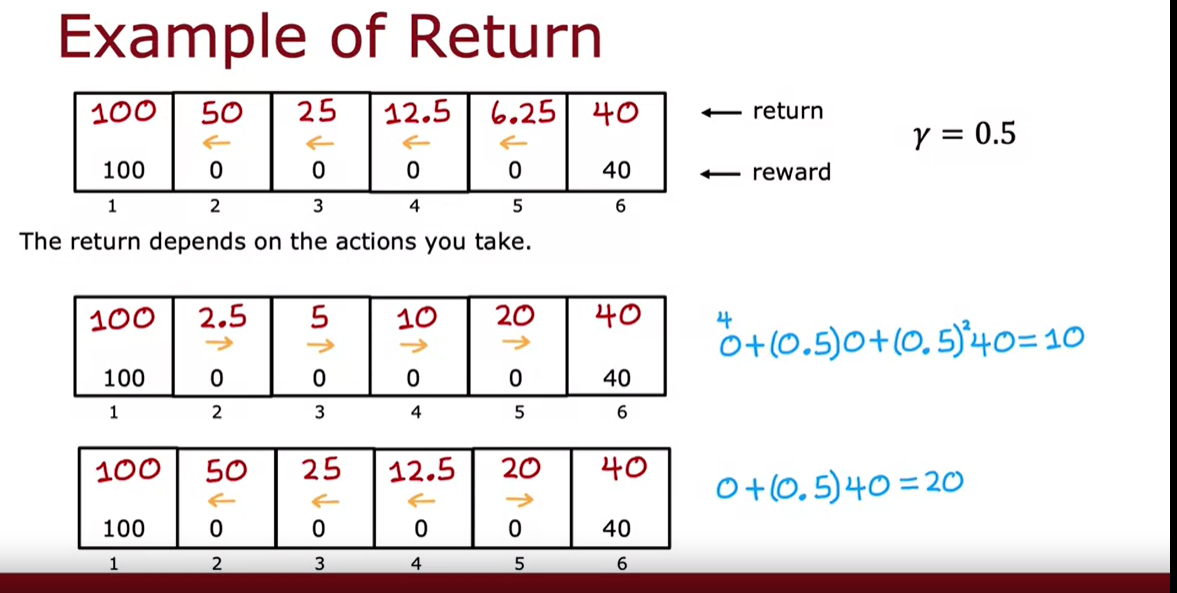

    The red numbers in the image are returns the agent get to reach the terminal state when the agent starts at that particular state. The actions are performed based on the arrows. The 3rd one is the optimal policy, as it tends to get highest return at whatever state the agent starts. Just compare the 1,2 with 3. Note that moving right at all states has minimum rewards for most of the states, also moving left at all the states have minimum rewards at some states. But the third policy results in maximum reward for every action the agent takes as per the third ploicy.
    
     In reinforcement learning, our goal is to come up with a function which is called a policy π, whose job it is to take as input any state s and map it to some action a that it wants us to take. For example, for this 3rd policy  above, this policy would say that if you're in state 2, then it maps us to the left action. If you're in state 3, the policy says go left. If you are in state 4 also go left and if you're in state 5, go right. 
     
     Pi applied to state S, tells us what action it wants us to take in that state. 
     
     The goal of reinforcement learning is to find a policy π or π(S) that tells you what action to take in every state so as to maximize the return. (a = π(S))

##### #### Markov Decision Process (MDP):
     
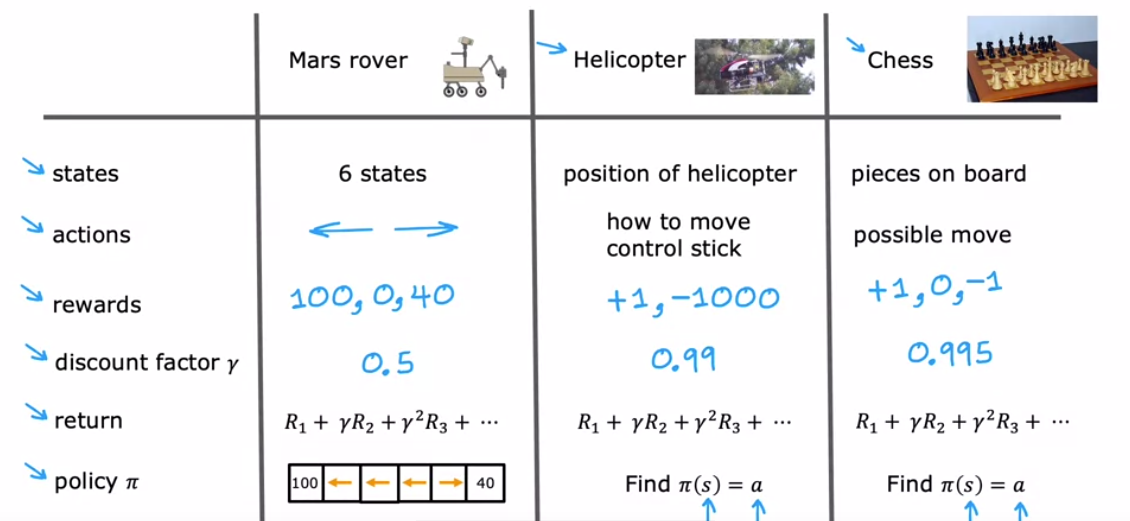

    This above formalism of a reinforcement learning application actually has a name. It's called a Markov decision process. This term Markov decision process or MDP for short, that's just the formalism that we've been talking about in the last few videos. 
    
    The term Markov in the MDP or Markov decision process refers to that the "future only depends on the current state and not on anything that might have occurred prior to getting to the current state". 
    
    In other words, in a Markov decision process, the future depends only on where you are now, not on how you got here. 
    
    One other way to think of the Markov decision process formalism is that we have a robot or some other agent that we wish to control and what we get to do is choose actions a and based on those actions, something will happen in the world or in the environment, such as our position in the world changes or we get to sample a piece of rock and execute the science mission. The way we choose the action a is with a policy Pi and based on what happens in the world, we then get to see or we observe back what state we're in, as well as what rewards are that we get.

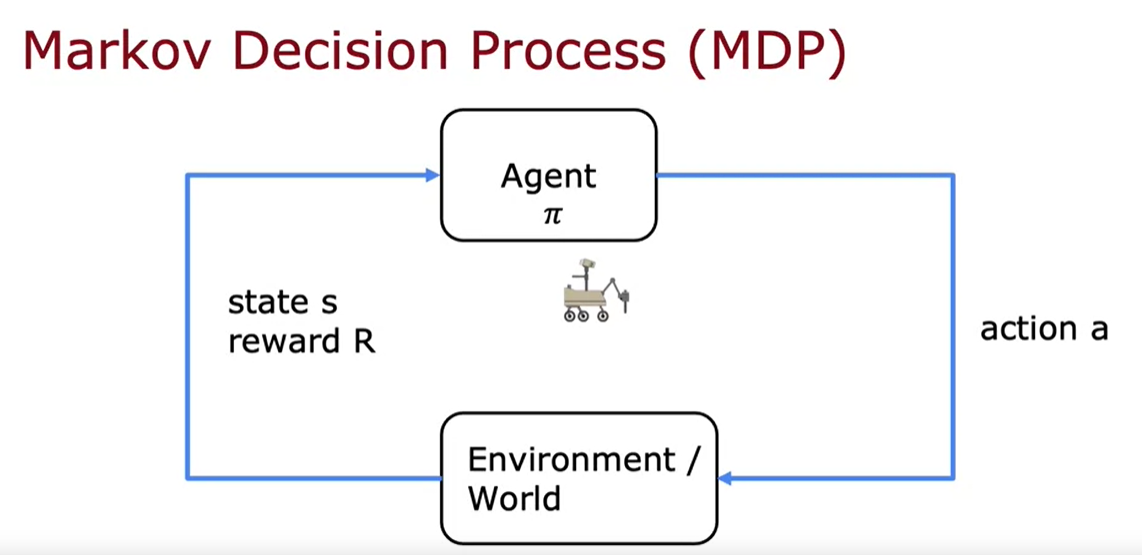

    You sometimes see different authors use a diagram like this to represent the Markov decision process or the MDP formalism but this is just another way of illustrating the set of concepts that you learn about in the last few videos

##### State action value function or Q function or Q(s, a):

    How do we get to choose this optimal policy π i.e how do we find out what are the good actions to take at each state?
    
    Using an learning algorithm for picking good actions.
    
    But the first step toward devloping an learning algorithm will be to define and then eventually learn to compute the "State action value function or Q function or Q(s, a)" . 
    
    This function is one of the key quantities that reinforcement learning algorithms will try to compute.
     
    The state action value function is a function typically denoted by the letter uppercase Q. And it's a function of a state you might be in as well as the action you might choose to take in that state and Q(s, a). 
    
     Q(s, a) computes or it will give a number that equals the return R at that state "s" for that action "a". 
    
    Formally,
        Q(s, a) = Return R if you
                    - start in state s
                    - take action a (just once)
                    - Then behave optimally after that
    
    This essentially means, if you are in state s, then agent performs action a of its choice once, and after that, agent will take whatever actions that will result in the highest possible return at each state.
    
    But, how do we know, what is the optimal behaviour? If we already know the optimal behavior, why there is need to to take action a randomly at state s and then behave optimally from then? We can take that optimal path from the current state s only right? And, if we already know the optimal path, what is the need for function Q(s, a). The agent can take this optimal path already right?
    
    In the below image, the first one is the optimal policy we found out using returns calculating at each step by choosing actions of going completely right or completely left, and choosing the policy that gives best returns in the previous sections on the fly for demonstration.  But in general, it is the idea of Q function to get to this optimal policy in the first place.
    
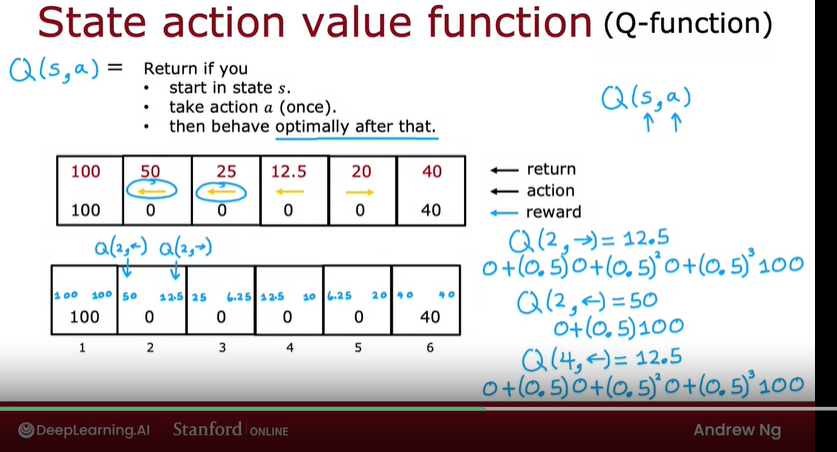
    
    What Q(s,a) does is, it will calculate return for all the actions an agent can take at each state s.
    
    Once it is calculated, the agent will perform its own action first at any of its current starting state s, and from then chooses actions where the return is highest at each state.
    
    This is what it means to behave optimally after performing action a at state s.
    
    When we calculate all the q values at each state, the optimal policy which we seen in the above first diagram is what we get, when we consider any state as the current state s and perform its action a and move based on maximum returns at each state.
    
    Q function tells you what are your returns or really what is the value? How good is it? Once you can compute the Q function this will give you the way to pick actions as well based on the returns it calculated at each state. 
    
        "The best possible return from any state s is the largest/max value of Q(s, a) maximizing over a"
    
        "The best possible action for the state is the action "a" that actually maximizes Q(s, a)"
    
    If we have a way of computing Q(s,a) for every state and for every action, then when the agent is in some state s all it have to do is look at the different actions a and pick the action a that maximizes Q(s,a) and so π(s) can just pick the action a that gives the largest value of Q(s,a) and that will turn out to be a good and optimal action.

    
    Whats the need of taking action a once?
        Another intuition about why this makes sense is Q(s,a) is:
                Return if you
                    - start in state s
                    - take action a (just once)
                    - Then behave optimally after that
     
     This means, if the agent starts at state s, it is expected to perform any action a and then based on the action, the Q(s, a)'s are calcualted to make the decision on how to move forward from there.
     
      Noe: In reinforcement learning literature, sometimes you also see this Q function written as Q* and sometimes called Optimal Q function. The values at each state of Q are also called Q* values
     
     Side note:
     ----------
     In real world, we don't have idea of all the states  in advance. Mars rover is an example to show the demonstration. The Q values we are getting in Mars rorver is the true Q values. But in pratice, we dont get the true values. We "estimate" the true Q values. How we estimate? by Learning this Q function. using a learning algorithm called Q learning algorithm. But before that , we have to discuss some important equation. see below
   
       The question is, how do you compute these values Q(s, a) for all the states and actions especially when you are not aware of states an agent could take before hand? 
       
       In reinforcement learning, there's a key equation called the Bellman equation that will help us to compute the state action value function. Let's take a look at what is this equation is.

##### Bellman equation
    
    The Bellman equation captures the idea that the Q-value should be the sum of the immediate reward(reward from current states) and the discounted future rewards from the next state s'(just one next future state), considering the best action a' in that state(max Q(s', a') of all actions a' at s'
    
                            Bellman equation at state s says:
                            
                        -----------------------------------------------
                            
                            Q(s, a) = r(s) + γ max Q(s', a')
                        ------------------------------------------------
            
     Here s, a are the current state and the action performed by agent and r(s) is the reward of current state s. 
     s'(s prime) is the new state achieved by agent after perform action a at state s.
             max Q(s', a') is the maximum Q value out of all actions a' at new state s'.
             
     Note: if you're in a terminal state, then Bellman Equation simplifies to Q(s, a) = r(s) because there's no state s prime and so that second term would go away
     
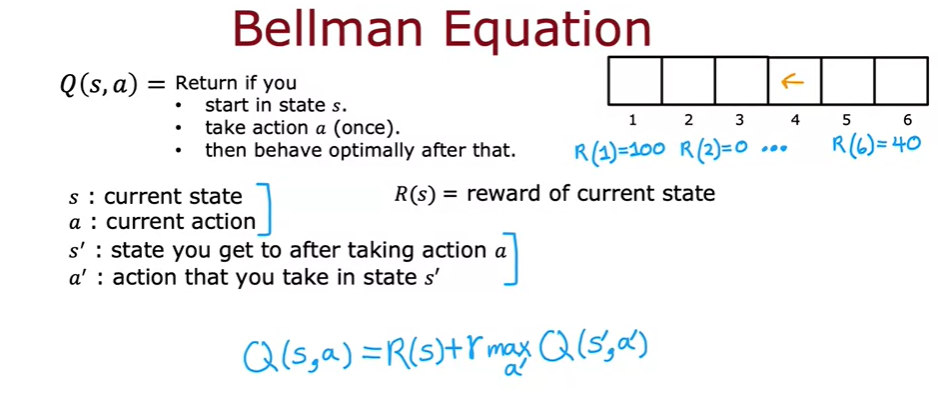
   

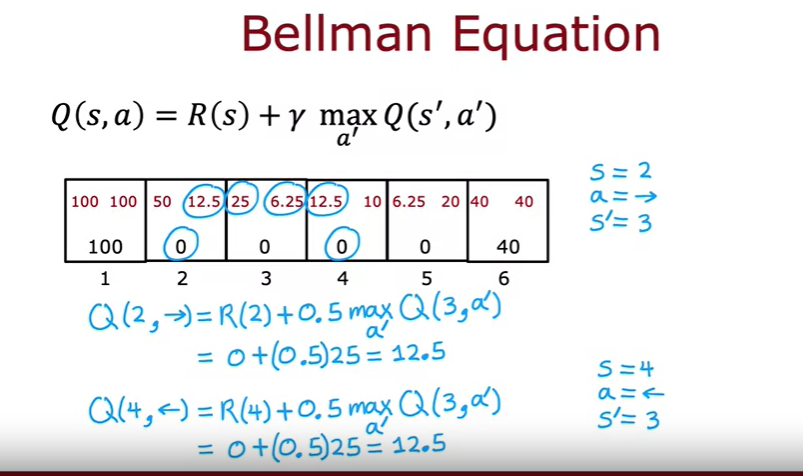

    We can justify the Bellman equation from the above Q function itself
                                   
       We saw earlier from the Q function, that the best possible return from any state "s" is max over a Q(s, a). 
       
       In fact, it turns out that the best possible return from a state s', is max over a' Q(s', a'). 
       
       We didn't really do anything other than rename S to S prime and a to a prime. 
       
       But this will make some of the intuitions a little bit easier later. 
       
       But for any state S prime, like State 3, the best possible return from, say, State 3 is the max over all possible actions of Q (S', a'). 
       
       From the Q function, the intuition that it captures is if you're starting from state s and you're going to take action a and then "act optimally" after that (take actions at each step that results in maximum returns), then you're going to see some sequence of rewards over time. 
       
       In particular, the return will be computed from the reward at the first step, plus Gamma times reward at the second step plus Gamma squared times reward at the third step, and so on. Plus dot, dot, dot until you get to the terminal state. 
       
                   Q(s, a) = r(s) + γ r(s2) + γ^2 r(s3) + ... γ^n r(s=terminalstate)
                           = r_1 + γ r_2 + γ^2 r_3 + ... γ^n r_terminalstate

    What Bellman equation says is this sequence of rewards with the discount factor is, can be broken down into two components. 
       
       First, r(s) or r1, that's the reward you get right away also called "Immediate reward". It's the reward you get for starting out in some state s. 
       
       The second term then is the following; after you start in state s and take action a, you get to some new state s'.
       
       The definition of Q(s, a) assumes we're going to behave optimally after that. After we get to s', we are going to behave optimally and get the best possible return from the state s'. 
       
       What this means is, max Q( s',  a') of a', this is the return from behaving optimally, starting from the state s'.
       
       That's exactly what we had written up here, is the best possible return for when you start from state s'. 
       
       Another way of phrasing this is this total return down here is also equal to:
       
               Q(s, a) = r_1 + γ r_2 + γ^2 r_3 + ... γ^n r_terminalstate
                       = r_1 + γ (r_2 + γ r_3 + ... γ^n-1 r_terminalstate) #factoring out gamma  --- (1)
                       
               
               Notice that if you were starting from state s', the sequence of rewards you get will be 
                           
            Q(s', a')  =  r_2 + γ r_3 + ... γ^n-1 r_terminalstate   ---- (1) where r_3, r_4 are the max rewards at each state
               
         That's why this expression above, that's the total return if you were to start from state s'. 
         
         If you were to behave optimally, then this expression should be the best possible return for starting from state s', which is why this sequence of discount rewards equals that max of a prime of Q(s', a') 
                
                            Q(s, a) = r_1 + γ max Q(s', a')
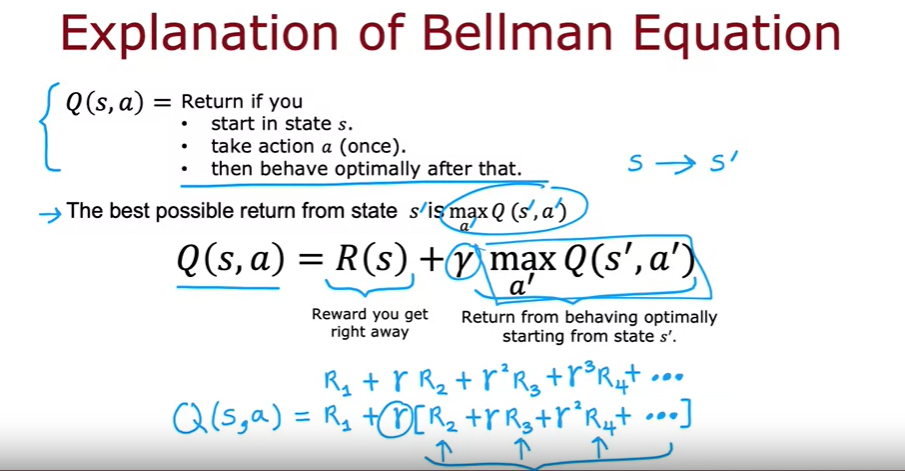       
      
      From this, it is clear that we can just calculate Q(s, a) at state s, by performing the action at that state and get to the new state s'. There is no need to calculate the entire cumulative rewards until the terminal node. This is usually needful because in real life, we or agent doesn't know how to reach to the terminal state to calculate all the states Q values. It just knows that there is a terminal state in the environment but dont know where it is and what are the states it need to achieve to reach that terminal state. 
      
      Imagine a person droppped off in an island in the middle of trees and he just knows there is a lake in the island. He doeant know what is the path to reach that lake. He just knows that he has to take some action to reach the lake. The action resulted in new state and from that new state, he will assess what is best action to take based on all possible actions that are available

##### Random stochastic environments
    In some applications, when you take an action, the outcome is not always completely reliable. 
    
    For example, if you command your Mars rover to go left maybe there's a little bit of a rock slide, or maybe the floor is really slippery and so it slips and goes in the wrong direction. 
    
    In practice, many robots don't always manage to do exactly what you tell them because of wind blowing and off course and the wheel slipping or something else. 
    
    There's a generalization of the reinforcement learning framework we've talked about so far, which models random or stochastic environments. 
    
    Here, we'll talk about how these reinforcement learning problems work, continuing with our simplifying Mars Rover example.
    
    Let's say you take the action and command it to go left. Most of the time you'll succeed but what if 10 percent of the time or 0.1 of the time, it actually ends up accidentally slipping and going in the opposite direction? 
    
    If the rover is in state 4, if you command it to go left, it has a 90 percent chance or 0.9 chance of correctly going in the left direction. But the 0.1 chance of actually heading to the right so that it has a 90 percent chance of ending up in say three in this example and a 10 percent chance of ending up in state five.
    
    Conversely, if you were to command it to go right and take the action, right, it has a 0.9 chance of ending up in state five and 0.1 chance of ending up in state three. This would be an example of a stochastic environment. 
    
    Let's see what happens in this reinforcement learning problem. 
    
    Let's say you use this policy shown here, where you go left in stages 2 3 4 and go right or try to go right in state five. 
    
    If you were to start in state four and you were to follow this policy, then the actual sequence of states you visit may be random. 
    
    For example, in state four, you will go left, and maybe you are lucky, and it actually gets the state three, and then you try to go left again, and maybe it actually gets there. You tell it to go left again, and it gets to that state. If this is what happens, you end up with the sequence of rewards 0 0 0 100. 
    
    But if you were to try this exact same policy a second time, maybe you're a little less lucky, the second time you start here. Try to go left and see it succeeds so a 0 from state 4, 0 from state 3. Now you tell it to go left, but you've got unlucky this time and the robot slips and ends up heading back to state 4 instead. 
    
    Then you're taught to call left, and left, and left, and eventually get to that reward of 100. In that case, this will be the sequence of rewards you observe. This one from 4 to 3, to 4 again, 3, 2, then 1, 
    
    or is even possible, if you tell from state 4 to go left following the policy you may get unlucky even on the first step and you end up going to state 5 because it slipped. Then state 5, you command it to go right, and it succeeds as you end up here.
    
    In this case, the sequence of rewards you see will be 0 0 40, because it went from 4 to 5, and then state 6.
    
    We had previously written out the return as sum of discounted rewards. But when the reinforcement learning problem is "stochastic", there isn't one sequence of rewards that you see for sure instead you see this sequence of different rewards. 
    
    In a stochastic reinforcement learning problem, what we're interested in is not maximizing the return because that's a random number. What we're interested in is, "maximizing the average value of the sum of discounted rewards". 
    
    By average value, I mean if you were to take your policy and try it out a thousand times or a 100,000 times or a million times, you get lots of different reward sequences like that and if you were to take the average over all of these different sequences of the sum of discounted rewards, then that's what we call the "expected return". 
    
    In statistics, "the term expected is just another way of saying average". 
    
    But what this means is, "we want to maximize what we "expect to get on average" in terms of the sum of discounted rewards. 
    
    The mathematical notation for this is to write this as "E" and it stands for expected value of R1 + γ R2 +, and so on. 
    
    The job of reinforcement learning algorithm is "to choose a policy Pi to maximize the average or the expected sum of discounted rewards"
    
    To summarize, when you have a "stochastic reinforcement learning problem" or a "stochastic Markov decision process" the goal is to choose a policy to tell us what action to take in state S so as to maximize the expected return.
    
    This stochastic reinforcement learning problem modifies Bellman equation a little bit. 
    
    The difference now is that when you take the action a in state s, the next state s' you get to is random. 
    
    When you're in state 3 and you tell it to go left the next state s' it could be the state 2, or it could be the state 4. S' is now random, which is why we also put an average operator or an expected operator here.
    
    We say that the total return from state s, taking action a, once and behaving optimally, is equal to the reward you get right away, also called the immediate reward plus the discount factor, Gamma plus what you expect to get on average of the future returns. 
                                    Q(s, a) = r(s) + γ E(max Q(s', a'))
    
    If you want to sharpen your intuition about what happens with these stochastic reinforcement learning problems. You'd change the parameter misstep_prob, which is the probability of your Mars Rover going in the opposite direction, than you had commanded it to. 
    
    If we set misstep_prob to be  is 0.1 and re-execute the Notebook and observe the optimal return values and q values for this stochastic MDP. If you were to take the best possible actions, take this optimal policy but the robot were to step in the wrong direction 10 percent of the time. 
    
    Notice that these values are now a little bit lower because you can't control the robot as well as before. The q values, as well as the optimal returns, have gone down a bit. In fact, if you were to increase the misstep probability, say 40 percent of the time the robot doesn't even go into directions. You're commanding it to only 60 percent of the time. It goes where you told it to, then these values end up even lower because your degree of control over the robot has decreased. Play with the optional lab and change the value of the misstep probability and see how that affects the final return or the average expected return, as well as the Q values, Q(s, a). 
    Now, in everything we've done so far, we've been using this Markov decision process, this Mars rover with just six states. For many practical applications, the number of states will be much larger.
    
    In the next section, we'll take the reinforcement learning or Markov decision process framework we've talked about so far and generalize it to this much richer and maybe even more interesting set of problems with much larger and in particular with continuous state spaces.    

#### Important note about the expected value
    ---------------------------------------
    The expectation operation is not over all possible policies. If you watch the following lecture again:

    Each row of the blue numbers was representing one possible path, and the expectation (or the average) operation is done over those "paths" (instead of policy).
    
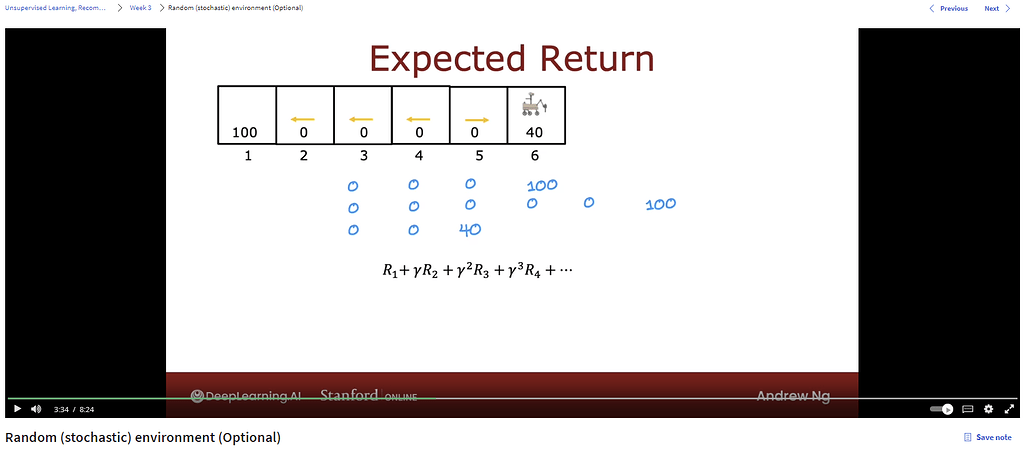

    However, the lab didn’t simulate the paths, and it does not have to either, because the transition_prob already contain all the information about how the bot transits. In other words, if we are interested how the bot moves, concentrating on the transition_prob is already sufficient, rather than having to generate the paths out. Observe the calculate_Q_value() function. 

    The expected return is calculated in line 33. And what it does is the following:

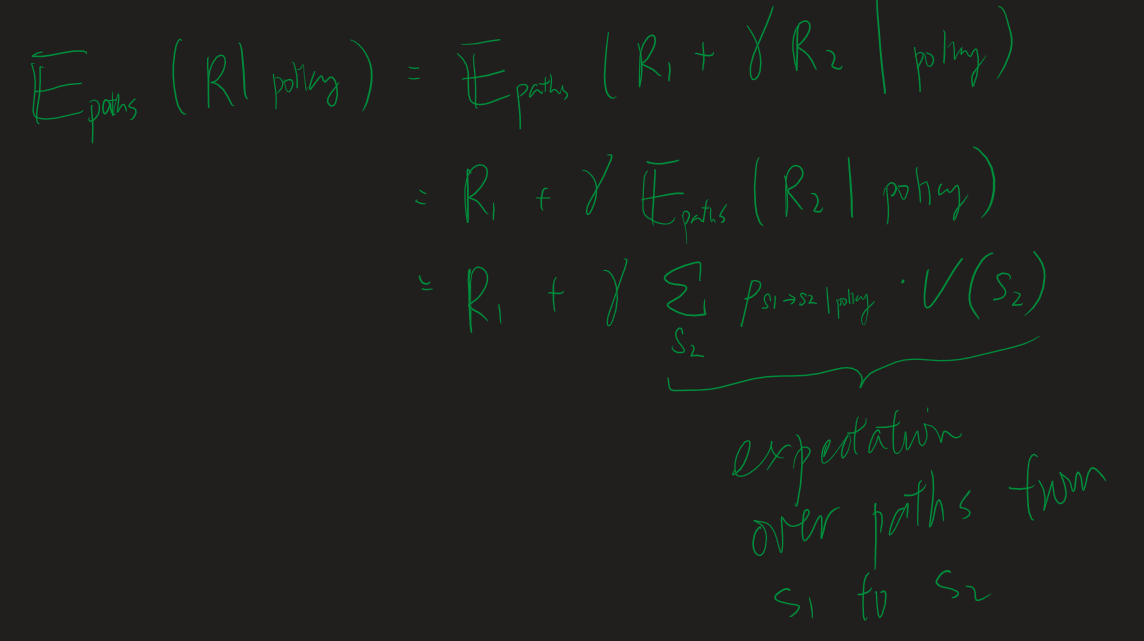
    
    This is what's happening in the function calculate_Q_value()

In [21]:
import numpy as np

In [44]:
#intialize no of states, no. of actions per each state, discount rate gamma
num_states = 6
num_actions = 2 #left action and right action , action 0 => going left, action 1 => going right
gamma = 0.9

    Intialise the terminal rewards and the intermediate steps rewards agent could get

In [81]:
def get_rewards(num_states, each_step_reward, terminal_left_reward, terminal_right_reward):
#     rewards = np.zeros(num_states)

    rewards = [each_step_reward] * num_states #intermediate rewards are already zero
    rewards[0] = terminal_reward_left #updating terminal rewards
    rewards[-1] = terminal_reward_right
    
    return rewards

    Now intialise the misstep probability at each step an agent could take. This denotes that enrvironment is random stochastic

In [83]:
def generate_transition_prob_sates(num_states, num_actions, misstep_prob=0):
    """
    calculate the misstep probability, correct probability during transition at each state for going left and going right
    
    """
    # 0 is left, 1 is right 
    p = np.zeros((num_states, num_actions, num_states))
#     print(p.shape)
    for i in range(num_states):
        #checking if it is not left terminal state
        if i != 0: 
            #for taking left action at each state
            p[i, 0, i-1] = 1 - misstep_prob #correct probability for going left by taking action 0
            p[i, 1, i-1] = misstep_prob #misstep probability of going right by taking action 1

        #checking if it is not right terminal state
        if i != num_states - 1:
            #for taking right action at each state
            p[i, 0, i+1] = misstep_prob #going right, but taking action 0 left, misstep probability 
            p[i, 1, i+1] = 1 - misstep_prob #going right, taking action 1 right, correct probability
    
    #terminal states misstep probability is zero as there are no further states to go further or back from terminal state
    p[0] = np.zeros((num_actions, num_states)) #just broadcasts the channel
    p[-1] = np.zeros((num_actions, num_states))
#     print(p)
    return p

#the loop basically assigning correct probability of going left, correct probability of going right, misstep probability of going left, misstep probability of going right for all the states
#except the terminal states where all the misstep probabilities are 0

    Now its time calculate q values at each state which is the expected/ avg Q value as the environment is stochastic in nature. Based on the q values, we can generate optimal policy

In [108]:
def calculate_Q_value(num_states, rewards, transition_prob, gamma, V_states, current_state, action):
    #state action value function with stochastic element using the bellman's equation. note that transition prob contains zero for all the states except the current state and its future and past state
    q_sa = rewards[current_state] + gamma * sum([transition_prob[current_state, action, sp] * V_states[sp] for sp in range(num_states)])
    #here V_states contains Q values and sp is the action the agent takes based on Q values
    return q_sa  

def evaluate_policy(num_states, rewards, transition_prob, gamma, policy):
    max_policy_eval = 10000 #the returns or Q we get is also random, so iterations
    threshold = 1e-10 #1 × 10^-10
    
    V = np.zeros(num_states) #Q values for each state
    
    for i in range(max_policy_eval):
        delta = 0
        for state in range(num_states):
            v_past = V[state]
            V[state] = calculate_Q_value(num_states, rewards, transition_prob, gamma, V, state, policy[state])
            delta = max(delta, abs(v_past - V[state])) #see if the difference between previous Q and current Q of a state is meaningful 
                       
        if delta < threshold:
            break
            
    return V

In [92]:
def improve_policy(num_states, num_actions, rewards, transition_prob, gamma, V, policy):
    policy_stable = True
    
    for s in range(num_states):
        q_best = V[s] # q calculated for each state
        for a in range(num_actions):
            q_sa = calculate_Q_value(num_states, rewards, transition_prob, gamma, V, s, a)
            if q_sa > q_best and policy[s] != a:
                policy[s] = a
                q_best = q_sa
                policy_stable = False
    return policy, policy_stable

def get_optimal_policy(num_states, num_actions, rewards, transition_prob, gamma):
    optimal_policy = np.zeros(num_states, dtype=int) #contains series of actions to be performed
    
    #policy is stochastic cuz of random environment. So perform the operations several times to get the expected policy
    max_policy_iter = 10000
    for i in range(max_policy_iter):
        policy_stable = True
        
        #generate Q values for each state
        V = evaluate_policy(num_states, rewards, transition_prob, gamma, optimal_policy)
        
        optimal_policy, policy_stable = improve_policy(num_states, num_actions, rewards, transition_prob, gamma, V, optimal_policy)
        
        if policy_stable:
            break
            
    return optimal_policy, V

    Note:    
    Observe, that finding out q_left and q_right is actually being calculated in the improve_policy(). So, the policy is first initialized to be random, and then based on this random policy, the q values are calculated at each state with this random policy in the first step.

    And from then, the policy is improved/optimized based on q values of action 0(left) and action 1(right) at every state in improve_policy().

    Dont get confused  bcuz, the variables with names q_left and q_right are written after finding the optimal policy in generate_visualization(). This is just to show the q_left and q_right values from which the optimal_policy is actually found in the plot.


In [103]:
def calculate_Q_values(num_states, rewards, transition_prob, gamma, optimal_policy):
    # Left and then optimal policy
    q_left_star = np.zeros(num_states)

    # Right and optimal policy
    q_right_star = np.zeros(num_states)
    
    V_star =  evaluate_policy(num_states, rewards, transition_prob, gamma, optimal_policy)
#     print(V_star) #gives optimal Q values at all the states by sending optimal policy to evaluate_policy
    
    for s in range(num_states):
        q_left_star[s] = calculate_Q_value(num_states, rewards, transition_prob, gamma, V_star, s, 0)
        q_right_star[s] = calculate_Q_value(num_states, rewards, transition_prob, gamma, V_star, s, 1)
        
    return q_left_star, q_right_star

In [76]:
def plot_optimal_policy_return(num_states, optimal_policy, rewards, V):
    actions = [r"$\leftarrow$" if a == 0 else r"$\rightarrow$" for a in optimal_policy]
    actions[0] = ""
    actions[-1] = ""
    
    fig, ax = plt.subplots(figsize=(2*num_states,2))

    for i in range(num_states):
        ax.text(i+0.5, 0.5, actions[i], fontsize=32, ha="center", va="center", color="orange")
        ax.text(i+0.5, 0.25, rewards[i], fontsize=16, ha="center", va="center", color="black")
        ax.text(i+0.5, 0.75, round(V[i],2), fontsize=16, ha="center", va="center", color="firebrick")
        ax.axvline(i, color="black")
    ax.set_xlim([0, num_states])
    ax.set_ylim([0, 1])

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title("Optimal policy",fontsize = 16)

def plot_q_values(num_states, q_left_star, q_right_star, rewards):
    fig, ax = plt.subplots(figsize=(3*num_states,2))

    for i in range(num_states):
        ax.text(i+0.2, 0.6, round(q_left_star[i],2), fontsize=16, ha="center", va="center", color="firebrick")
        ax.text(i+0.8, 0.6, round(q_right_star[i],2), fontsize=16, ha="center", va="center", color="firebrick")

        ax.text(i+0.5, 0.25, rewards[i], fontsize=20, ha="center", va="center", color="black")
        ax.axvline(i, color="black")
    ax.set_xlim([0, num_states])
    ax.set_ylim([0, 1])

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title("Q(s,a)",fontsize = 16)

In [104]:
def generate_visualization(terminal_left_reward, terminal_right_reward, each_step_reward, gamma, misstep_prob):
    
    rewards = generate_rewards(num_states, each_step_reward, terminal_left_reward, terminal_right_reward)
#     print(f"Rewards: {rewards}")

    transition_prob = generate_transition_prob_sates(num_states, num_actions, misstep_prob)
#     print(f"transition prob {transition_prob}")
    
    optimal_policy, V = get_optimal_policy(num_states, num_actions, rewards, transition_prob, gamma) #optimal policy contains actions 0 or 1 at each state, q is the best q value at each state
#     print(f"optimal policy {optimal_policy}") #[0 0 0 0 1 0]
#     print(f"Q values at each state {V} after taking max of actions") #[100.    46.06  21.25  10.49  18.52  40.  ]
    
    #for second plot to show the q right anf q left for each state
    q_left_star, q_right_star = calculate_Q_values(num_states, rewards, transition_prob, gamma, optimal_policy)
#     print(f"Q left for all the states {q_left_star}") #[100.    46.06  21.25  10.49   6.72  40.  ]
#     print(f"Q right for all the states {q_right_star}") # [100.    14.56   7.02   9.4   18.52  40.  ]
    
    plot_optimal_policy_return(num_states, optimal_policy, rewards, V)
    plot_q_values(num_states, q_left_star, q_right_star, rewards)
    
    

[100.    46.06  21.25  10.49  18.52  40.  ]


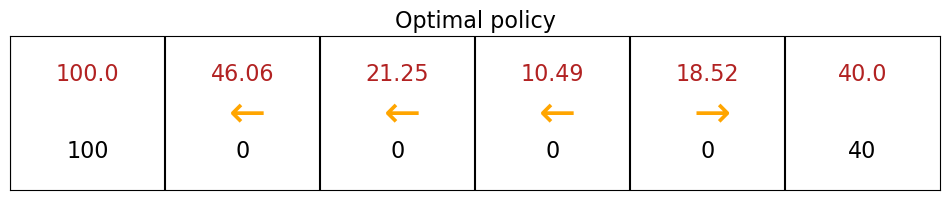

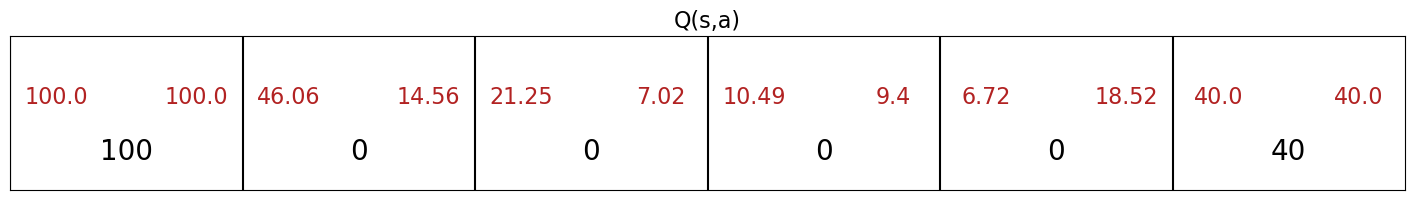

In [105]:
np.set_printoptions(precision=2)
num_states = 6
num_actions = 2
each_step_reward = 0 #intermediate rewards
terminal_left_reward = 100
terminal_right_reward = 40
misstep_prob = 0.1 #10 percent chance that agent go in opposite than it is intended
gamma = 0.5 #discount factor
    
generate_visualization(terminal_left_reward, terminal_right_reward, each_step_reward, gamma, misstep_prob)

In [192]:
#Self Practice
def calculate_Q_value(num_states, rewards, transition_prob_states, gamma, current_state, action, V):
    q = rewards[current_state] + gamma * sum([transition_prob_states[current_state, action, state] * V[state] for state in range(num_states)])
    return q

def improve_policy(num_states, num_actions, rewards, transition_prob_states, gamma, V, policy):
    policy_stable = True
    
    for state in range(num_states):
        q_best_state = V[state]
        for action in range(num_actions): #identifies which of 2 actins are the best action. 
            q_state_action = calculate_Q_value(num_states, rewards, transition_prob_states, gamma, state, action, V)
            if q_state_action > q_best_state:
                policy_stable = False
                q_best_state = q_state_action
                policy[state] = action
                
    return policy, policy_stable

def evaluate_policy(num_states, rewards, transition_prob_states, gamma, policy):
    max_policy_eval = 10000 #Q is also random based on the policy
    threshold = 1e-10
    V = np.zeros(num_states)
    
    for i in range(max_policy_eval):
        delta = 0
        for state in range(num_states):
            v_s = V[state] #get the previous q value of  a state in iteration
            V[state] = calculate_Q_value(num_states, rewards, transition_prob_states, gamma, state, policy[state], V) #calcualte the new q value. for first iterations, action will be going left for all states, from then the policy will be improved
            delta = max(delta, abs(V[state] - v_s))
        if delta < threshold:
            break
    return V

def generate_optimal_policy(num_states, num_actions, rewards, transition_prob_states, gamma):
    max_policy_iter = 10000
    optimal_policy = np.zeros(num_states, dtype="int") #left action for all the states initially.we updates the optimal policy after every iteration
    for i in range(max_policy_iter):
        V = evaluate_policy(num_states, rewards, transition_prob_states, gamma, optimal_policy) #for first iteration, the policy will have all left actions
        
        optimal_policy, policy_stable = improve_policy(num_states, num_actions, rewards, transition_prob_states, gamma, V, optimal_policy)
        if policy_stable:
            break
    return optimal_policy, V

def calculate_Q_values(num_states, rewards, transition_prob, gamma, optimal_policy):
    # Left and then optimal policy
    q_left_star = np.zeros(num_states)

    # Right and optimal policy
    q_right_star = np.zeros(num_states)
    
    #get the Q values using the optimal policy 
    V_star =  evaluate_policy(num_states, rewards, transition_prob, gamma, optimal_policy)
    for state in range(num_states):
        #get the q values for ledt and right actions
        q_left_star[state] = calculate_Q_value(num_states, rewards, transition_prob, gamma, state, action=0, V=V_star)
        q_right_star[state] = calculate_Q_value(num_states, rewards, transition_prob, gamma, state, action=1, V=V_star)    
    return q_left_star, q_right_star

def generate_transition_probs(num_states, num_actions, misstep_prob=0.0):
    p = np.zeros((num_states, num_actions, num_states))
    for i in range(num_states):
        if i != 0:
            p[i, 0, i-1] = 1 - misstep_prob
            p[i, 1, i-1] = misstep_prob
        if i != num_states-1:
            p[i, 0, i+1] = misstep_prob
            p[i, 1, i+1] = 1 - misstep_prob
    p[0] = np.zeros((num_actions, num_states))
    p[-1] = np.zeros((num_actions, num_states))
    return p

def get_rewards(num_states, each_step_reward, terminal_left_reward, terminal_right_reward):
    rewards = [each_step_reward] * num_states
    rewards[0] = terminal_left_reward
    rewards[-1] = terminal_right_reward
    return rewards

def generate_visualization(num_states, num_actions, each_step_reward, terminal_left_reward, terminal_right_reward, gamma, misstep_prob):
    rewards = get_rewards(num_states, each_step_reward, terminal_left_reward, terminal_right_reward)
    
    transition_prob_states_ = generate_transition_probs(num_states, num_actions, misstep_prob)
    
    optimal_policy, Q_val = generate_optimal_policy(num_states, num_actions, rewards, transition_prob_states_, gamma)
    
    q_left, q_right = calculate_Q_values(num_states, rewards, transition_prob_states_, gamma, optimal_policy)
    return optimal_policy, q_left, q_right, Q_val, rewards

In [193]:
num_states = 6
num_actions = 2
each_step_reward = 0
terminal_left_reward = 100
terminal_right_reward = 40
gamma = 0.9
misstep_prob = 0.1

optimal_policy, q_left, q_right, V, rewards = generate_visualization(num_states, num_actions, each_step_reward, terminal_left_reward, terminal_right_reward, gamma, misstep_prob)

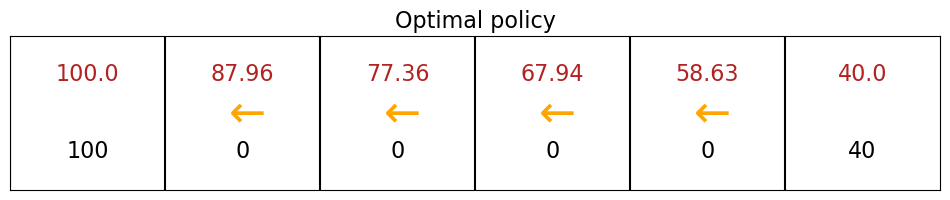

In [197]:
def plot_optimal_policy_return(num_states, optimal_policy, rewards, V):
    actions = [r"$\leftarrow$" if a == 0 else r"$\rightarrow$" for a in optimal_policy]
    actions[0] = ""
    actions[-1] = ""
    
    fig, ax = plt.subplots(figsize=(2*num_states, 2))

    for i in range(num_states):
        ax.text(i+0.5, 0.5, actions[i], fontsize=32, ha="center", va="center", color="orange")
        ax.text(i+0.5, 0.25, rewards[i], fontsize=16, ha="center", va="center", color="black")
        ax.text(i+0.5, 0.75, round(V[i], 2), fontsize=16, ha="center", va="center", color="firebrick")
        ax.axvline(i, color="black")
    
    ax.set_xlim([0, num_states])
    ax.set_ylim([0, 1])

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.tick_params()
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title("Optimal policy",fontsize = 16)

plot_optimal_policy_return(num_states, optimal_policy, rewards, V)

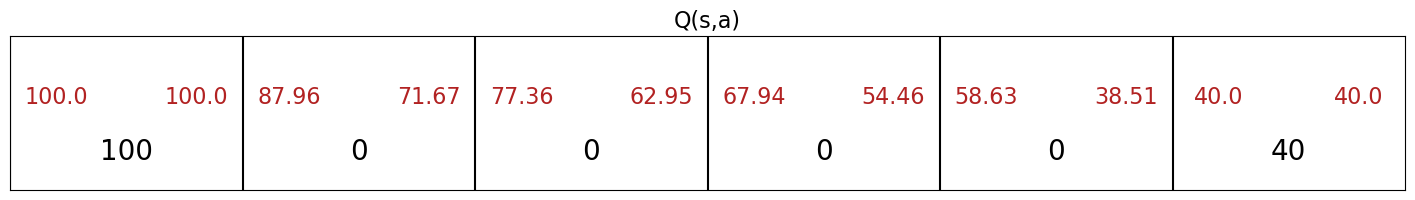

In [199]:
def plot_q_values(num_states, q_left_star, q_right_star, rewards):
    fig, ax = plt.subplots(figsize=(3*num_states,2))

    for i in range(num_states):
        ax.text(i+0.2, 0.6, round(q_left_star[i], 2), fontsize=16, ha="center", va="center", color="firebrick")
        ax.text(i+0.8, 0.6, round(q_right_star[i], 2), fontsize=16, ha="center", va="center", color="firebrick")

        ax.text(i+0.5, 0.25, rewards[i], fontsize=20, ha="center", va="center", color="black")
        ax.axvline(i, color="black")
        
    ax.set_xlim([0, num_states])
    ax.set_ylim([0, 1])

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_title("Q(s,a)",fontsize = 16)
    
plot_q_values(num_states, q_left, q_right, rewards)

 Q Learning Algorithm
    ---------------------
    The name says, this algorithm learns the Q function. Q-learning finds the Optimal policy by learning the optimal Q-values for each state-action pair.
